Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student id below:

In [236]:
NAME = "63070224"
STUDENT_ID = "Tunlaton Wongchai"

---

In [237]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# 1 k-Nearest Neighbour Classification

## 1.1 Load Iris dataset from sklearn library

In [238]:
iris = datasets.load_iris()

In [239]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [240]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 1.2 Define Setal Length (cm), Setal Width (cm), as $X$, Label—0 (Setosa), 1 (Versicolor) and 2 (Virginica) as $y$

In [241]:
X = iris['data'][:,2:]
y = (iris['target'] == 1).astype(np.int64).reshape(-1, 1)

## 1.3 Write a function to randomly split the dataset to be training and test sets:

$$
[X_{train}, y_{train}, X_{test}, y_{test}] = \texttt{splitData}(X, y, Percentage_{train}, n_{seed}),
$$

where $Percentage_{train}$ is the percentage of training sample split from the dataset, and $n_{seed}$ is a random generator number.

In [242]:
def splitData(X, y, percentage_train, n_seed):
    
    random  = np.random.RandomState(seed=n_seed)
    indexes = np.arange(X.shape[0])
    random.shuffle(indexes)

    X_temp = X[indexes].copy()
    y_temp = y[indexes].copy()

    n_train = int(percentage_train * X_temp.shape[0])

    X_train = X_temp[:n_train, :]
    y_train = y_temp[:n_train]

    X_test = X_temp[n_train:, :]
    y_test = y_temp[n_train:]


    
    return X_train, y_train, X_test, y_test

## 1.4 Write a function to normalise $X_{train}$ to $[0, 1]$:

$$
    [X_{train\_norm}, X_{max}, X_{min}] = \texttt{normaliseTrain}(X)
$$

*Note*: Use Min-Max feature scaling.

In [243]:
def normaliseTrain(X):
    
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)

    X_train_norm = (X - X_min) / (X - X_max)

    return X_train_norm, X_max, X_min

## 1.5 Write a function to normalise $X_{test}$ to the same space as the training set:

$$
    X_{test\_norm} = \texttt{normaliseTest}(X_{test}, X_{max}, X_{min})
$$

In [244]:
def normaliseTest(X_test, X_max, X_min):
    
    X_test_norm = (X_test- X_min) / (X_test - X_max) 
    
    return X_test_norm

## 1.6 Write a function to calculate Manhattan distance between two points, $x_1$ and $x_2$:

$$
    distance = \texttt{manhattanDistance}(x_1, x_2)
$$

In [245]:
def manhattanDistance(x1, x2):
    distance = np.abs(x1 - x2[:, 0, np.newaxis])
    
    return distance

## 1.7 Write a function to find $k$-nearest neighbour points that are nearest to input sample, $x_{ref}$:

$$
    neighbour = \texttt{findKneighbour}(x_{ref}, X_{train}, k),
$$

where $neighbour \in R^{k \times nFeatures}$. Here, $nFeatures = 2$.

In [246]:
def findKneighbour(test_sample, train, k):
    sample_distance = manhattanDistance(test_sample, train)
    sample_distance = np.hstack((sample_distance, train[:, -1, np.newaxis]))
    sample_distance = sample_distance[np.argsort(sample_distance[:, 0])]
    
    neighbour = sample_distance[:k, :]
    
    return neighbour

## 1.8 Write a function to predict an input sample $x$ with $k$-nearest neighbour:

$$
    predictClass = \texttt{predict}(x, X_{train}, k)
$$

In [247]:
def predict(test_sample, train, k):
    
    neighbour = findKneighbour(test_sample, train, k)
    unique, counts = np.unique(neighbour[:,1], return_counts=True)
    
    return unique[np.argmax(counts)]

## 1.9 Write a kNN function to predict $X_{test}$ with $k$-nearest neighbour:

$$
    y_{predict} = \texttt{kNN}(X_{test}, X_{train}, k),
$$

where $y_{predict}$ is a vector of predicted class that corresponds to $x_{test}$.

In [248]:
def Knn(X_test, X_train, k):
    prediction_class = np.array([])
    
    for test_sample in X_test:
        prediction = predict(test_sample, X_train, k)
        prediction_class = np.append(prediction_class, prediction)
        
    return prediction_class.astype(np.int64).reshape(-1, 1)

## 1.10 Write a function to calculate accuracy of $y_{predict}$:

$$
    accuracy = \texttt{calculateAccuracy}(y_{predict}, y_{test})
$$

In [249]:
def Accuracy(predict,target):

    correct = np.sum(predict == target)
    acc = correct*100/predict.shape[0]
    
    return acc

## 1.11 Split the dataset to 70 % training set and 30 % test set with random generator number of 10. Run $k$-Nearest Neighbour classifier with $k$ = 3 on the dataset. Calculate and observe the accuracy of the task.

In [250]:
X_train, y_train, X_test, y_test = splitData(X, y, 0.7, 10)

Accuracy(Knn(X_test, X_train, k=3), y_test)

2.2222222222222223

## 1.12 Normalise the iris dataset then use $k$-nearest Neighbour classifier with the same hyperparameter as the previous question on the dataset. Then observe the accuracy and compare accuracy to the model trained without normalisation.

In [251]:
X_train_norm, X_max, X_min = normaliseTrain(X_train)
X_test_norm = normaliseTest(X_test, X_max, X_min)

C:\Users\LAB203-01\AppData\Local\Temp\ipykernel_7492\2963714791.py:6: RuntimeWarning: divide by zero encountered in true_divide
  X_train_norm = (X - X_min) / (X - X_max)
C:\Users\LAB203-01\AppData\Local\Temp\ipykernel_7492\2785110629.py:3: RuntimeWarning: divide by zero encountered in true_divide
  X_test_norm = (X_test- X_min) / (X_test - X_max)


In [252]:
train = X_train
train_norm = X_train_norm

In [253]:
prediction = Knn(X_test, train, 4)
prediction_norm = Knn(X_test_norm, train_norm, 4)

C:\Users\LAB203-01\AppData\Local\Temp\ipykernel_7492\3253340431.py:2: RuntimeWarning: invalid value encountered in subtract
  distance = np.abs(x1 - x2[:, 0, np.newaxis])


In [254]:
# Compare the accuracy of the models.


print(Accuracy(Knn(X_test, X_train, k=3), y_test))
print(Accuracy(prediction_norm, y_test))

2.2222222222222223
46.666666666666664


## 1.13 Plot a Voronoi graph and observe the different between normalise data and non-normalise data.

In [255]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [256]:
vor = Voronoi(train[:, :-1])

voronoi_plot_2d(vor, show_vertices=False)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

ValueError: Need at least 2-D data

In [ ]:
vor = Voronoi(train_norm[:, :-1])

voronoi_plot_2d(vor, show_vertices=False)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

QhullError: QH6019 qhull input error (qh_scalelast): can not scale last coordinate to [   0,  inf].  Input is cocircular or cospherical.   Use option 'Qz' to add a point at infinity.

While executing:  | qhull v Qbb Qz Qc
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1924832352  voronoi  Qbbound-last  Qz-infinity-point  Qcoplanar-keep
  _pre-merge  _zero-centrum  Qinterior-keep  Pgood  _maxoutside  0


# 2. $k$-nearest Neighbour Regression

## 2.1 Randomly generate 100 samples with random generator number of 10 from the following equations:

$$
    random = \texttt{np.random.RandomState(seed)} \\
    X = \texttt{random.rand}(n) \\
    y = 4 + 5 \cdot X + \texttt{random.rand}(n)
$$

In [257]:
def generateSamples(n, seed):
    random = np.random.RandomState(seed)
    X = random.rand(n)
    y = 4 + 5*X + random.rand(n)

    X = X.reshape(-1, 1)
    y = y.reshape(-1, 1)
    return X, y

In [258]:
X, y = generateSamples(100, 10)

## 2.2 Plot a scatter graph of the generated samples

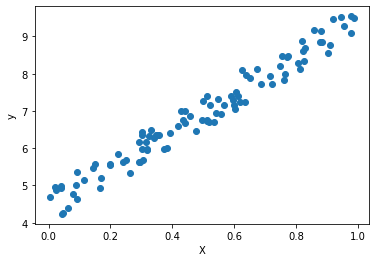

In [259]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## 2.3 Split the data into training and test sets with $Percentage_{train} = 0.8$ and $nSeed = 10$.

In [260]:
X_train, y_train, X_test, y_test = splitData(X, y, 0.8, 10)

## 2.4 Write a function to calculate the square error of $y_{predict}$:

$$
    error = \texttt{squareError}(y_{predict}, y_{test})
$$

In [261]:
def squareError(pred, true):
    error = np.mean(np.square(pred - true))

    return error

## 2.5 Use a $k$-nearest Neighbour Regression with $k = 3$ to predict $y_{test}$. Calculate the error and discuss the results when applying kNN on normalised and non-normalised dataset

In [299]:
def predict(test_sample, train, k):
    
    neighbour = findKneighbour(test_sample, train, k)
    pred = np.mean(neighbour[:, -1])
    
    return pred

In [300]:
def KnnRegression(y_train, X_train, k):
    y_pred = np.array([])

    for x in x_train:
        pred = predict(test_sample, X_train, k)
        y_pred = np.append(y_pred, pred)

    return y_pred


## 2.6 Plot a scatter graph to compare between $y_{test}$ and $y_{predict}$ of normalised and non-normalised dataset.

In [304]:
prediction = KnnRegression(y_train, X_train, 3)

In [303]:
y_test

array([[4.92969923],
       [8.84899742],
       [6.17779734],
       [5.97759198],
       [6.70347458],
       [6.01067898],
       [9.27930088],
       [7.71684036],
       [5.13667173],
       [7.31095968],
       [8.43473965],
       [7.96351633],
       [5.19621057],
       [7.05382277],
       [9.10004599],
       [7.16621423],
       [7.89705804],
       [4.94127291],
       [7.40044622],
       [5.00488976]])

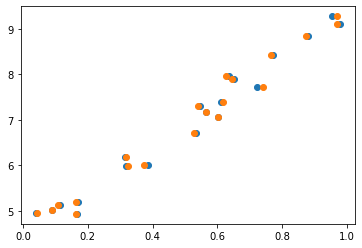

In [293]:
plt.scatter(X_test, y_test)
plt.scatter(prediction, y_test)

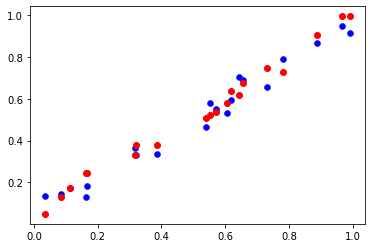

Error : 0.003492547129450057


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## 2.7 According to the results of both classification and regression tasks, what do you observe when we normalise the data.

YOUR ANSWER HERE